In [19]:
!pip install yfinance
!pip install pandas

In [20]:
# Part 1: Import Libraries
import datetime as dt
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
# Part 2: Define Symbols and Date Range
symbols_list = ["AUDJPY=X", "AUDUSD=X", "TIO=F", "EURUSD=X", "CAD=X", "CL=F", "HG=F", "ZT=F"]
start = dt.datetime(2011, 1, 1)
end = dt.datetime(2024, 4, 23)


In [22]:
# Part 3: Download and Inspect Data
data = yf.download(symbols_list, start=start, end=end)

# Check if data is loaded correctly by printing the first few rows
print("Initial data check:")
print(data.head())


[*********************100%%**********************]  8 of 8 completed


Initial data check:
Price       Adj Close                                                  \
Ticker       AUDJPY=X  AUDUSD=X    CAD=X       CL=F  EURUSD=X    HG=F   
Date                                                                    
2011-01-03  82.839996  1.021440  0.99270  91.550003  1.335791  4.4515   
2011-01-04  83.019997  1.016911  0.99239  89.379997  1.335684  4.3635   
2011-01-05  82.600403  1.007201  0.99700  90.300003  1.332108  4.4015   
2011-01-06  83.139999  0.999900  0.99650  88.379997  1.315686  4.3210   
2011-01-07  82.695000  0.993049  0.99750  88.029999  1.297993  4.2725   

Price                                   Close            ...        Open  \
Ticker           TIO=F        ZT=F   AUDJPY=X  AUDUSD=X  ...       TIO=F   
Date                                                     ...               
2011-01-03  170.000000  109.429688  82.839996  1.021440  ...  170.000000   
2011-01-04  172.070007  109.398438  83.019997  1.016911  ...  172.070007   
2011-01-05  174

In [23]:
# Part 4: Prepare Data
# Keep only the adjusted close prices
adjusted_close = data['Adj Close']

# Calculate daily returns
returns = adjusted_close.pct_change()

# Drop rows with NaN values which might be present especially at the beginning
returns = returns.dropna()

# Quick data check after preprocessing
print("Data after preprocessing:")
print(returns.head())


Data after preprocessing:
Ticker      AUDJPY=X  AUDUSD=X     CAD=X      CL=F  EURUSD=X      HG=F  \
Date                                                                     
2011-01-04  0.002173 -0.004434 -0.000312 -0.023703 -0.000080 -0.019769   
2011-01-05 -0.005054 -0.009548  0.004645  0.010293 -0.002678  0.008709   
2011-01-06  0.006533 -0.007249 -0.000501 -0.021263 -0.012328 -0.018289   
2011-01-07 -0.005352 -0.006852  0.001003 -0.003960 -0.013447 -0.011224   
2011-01-10 -0.000723  0.002190 -0.005714  0.013859 -0.006538 -0.004213   

Ticker         TIO=F      ZT=F  
Date                            
2011-01-04  0.012177 -0.000286  
2011-01-05  0.014122 -0.002142  
2011-01-06 -0.005731  0.000930  
2011-01-07  0.000000  0.001502  
2011-01-10  0.000000  0.000500  


/var/folders/37/wh1059x166lgs8pq3zpkqdf40000gn/T/ipykernel_43217/3919371304.py:6: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = adjusted_close.pct_change()


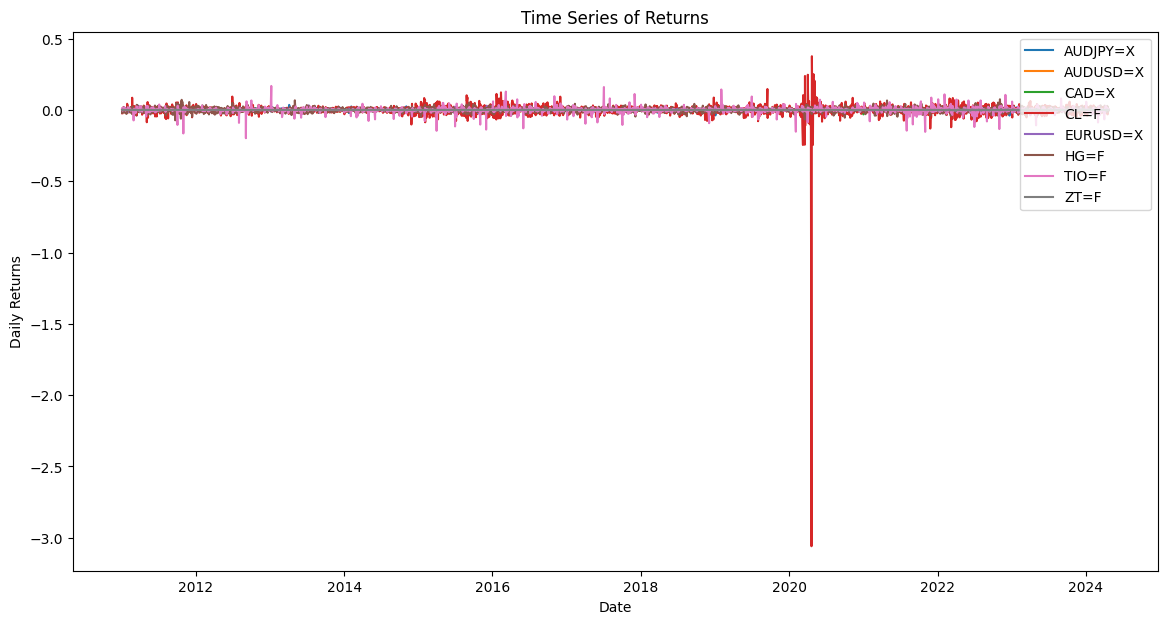

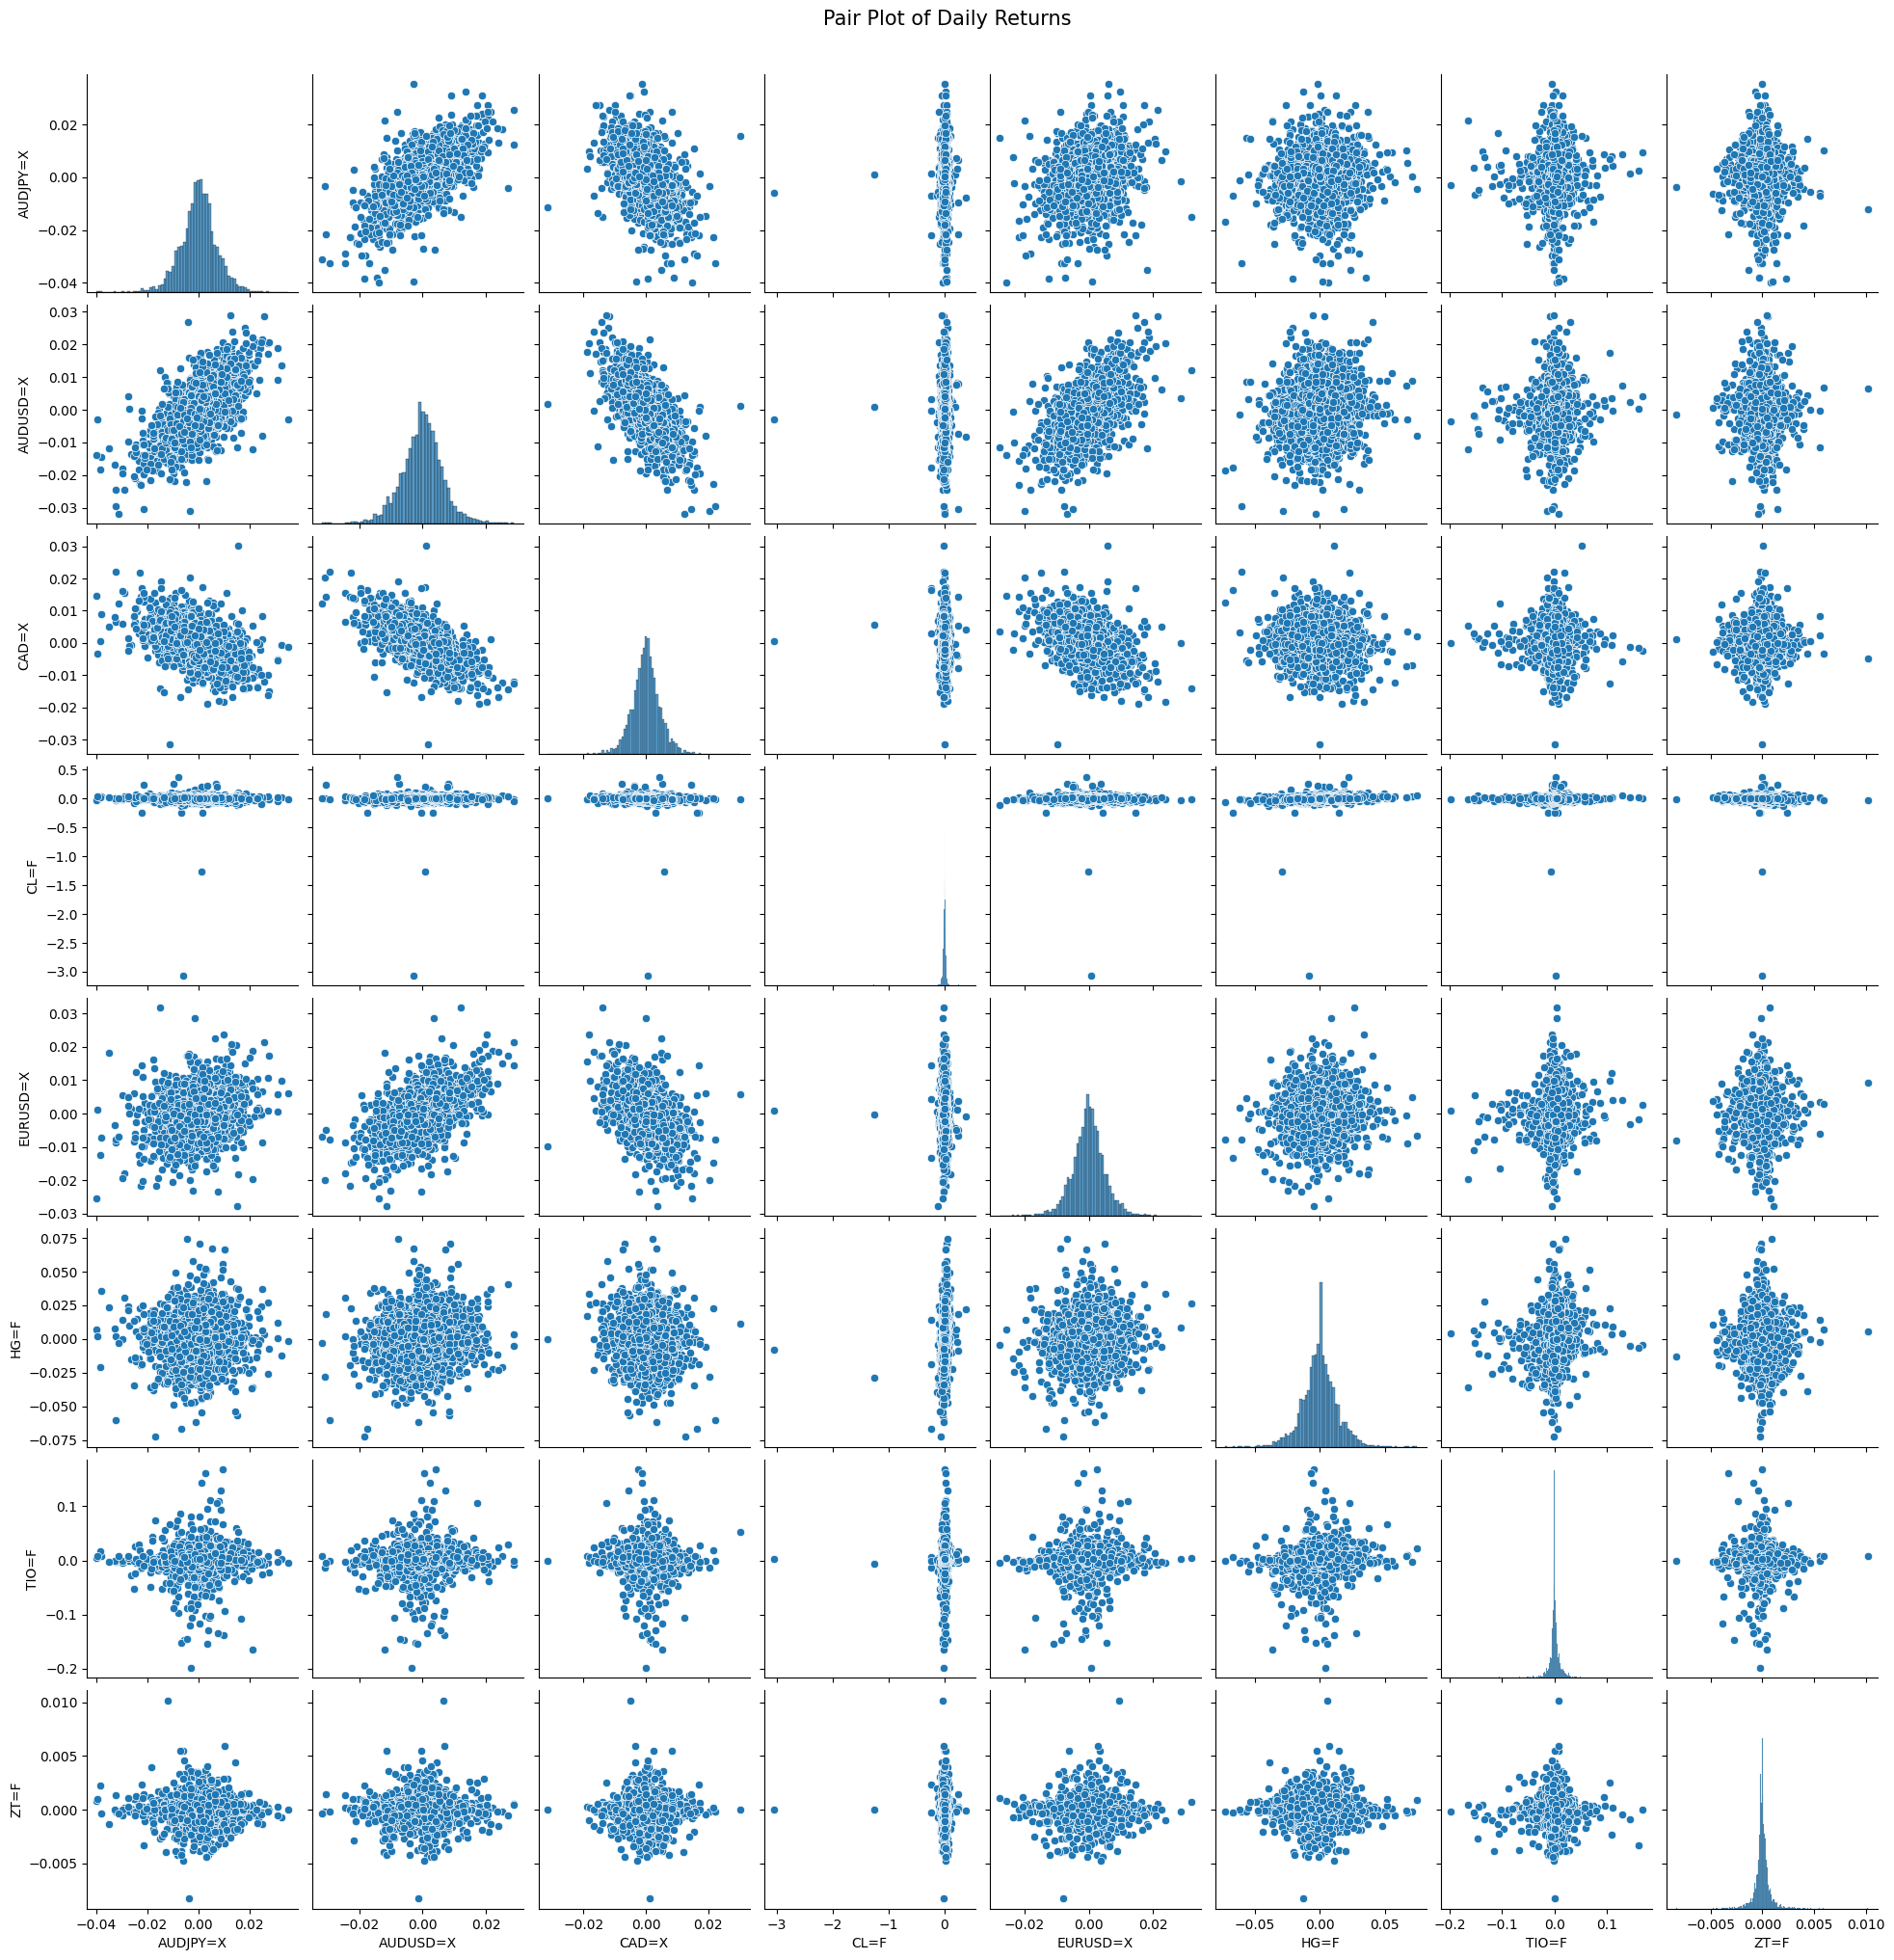

In [24]:
# Part 4.5: Visual Inspection of Returns
# Plotting time series of returns for each symbol
plt.figure(figsize=(14, 7))
for symbol in returns.columns:
    plt.plot(returns.index, returns[symbol], label=symbol)

plt.legend(loc='upper right')
plt.title('Time Series of Returns')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.show()

# Generating a pair plot of the returns to visually inspect correlations
sns.pairplot(returns)
plt.suptitle('Pair Plot of Daily Returns', size=15, y=1.02)
plt.show()


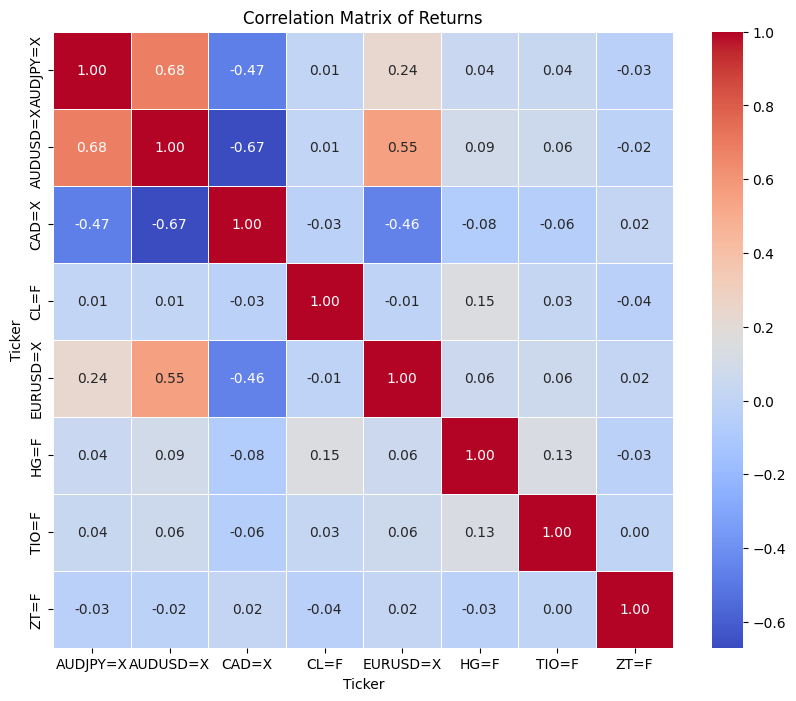

In [25]:
# Part 5: Compute and Visualize Correlation Matrix
correlation_matrix = returns.corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Returns')
plt.show()


In [26]:
# Part 6: Data Acquisition for Iron Ore Prices
# Assuming "TIO=F" is the ticker for iron ore and is already included in your symbols list

symbols_list.append("TIO=F")  # Add iron ore ticker symbol if not already included
data = yf.download(symbols_list, start=start, end=end)  # Re-download data with the added symbol


[*********************100%%**********************]  8 of 8 completed


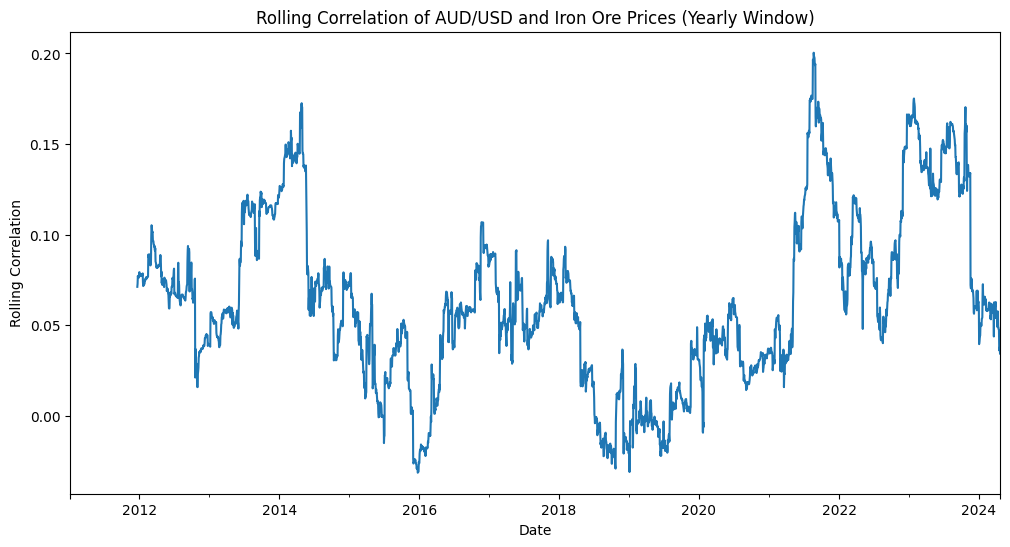

In [27]:
# Part 7: Calculate Correlation Over Time
# Extract AUD to Iron Ore returns
aud_returns = returns['AUDUSD=X']
iron_returns = returns['TIO=F']

# Calculate rolling correlation with a window (e.g., 252 trading days which is roughly one year)
rolling_correlation = aud_returns.rolling(window=252).corr(iron_returns)

# Plot the rolling correlation
plt.figure(figsize=(12, 6))
rolling_correlation.plot(title='Rolling Correlation of AUD/USD and Iron Ore Prices (Yearly Window)')
plt.xlabel('Date')
plt.ylabel('Rolling Correlation')
plt.show()


In [28]:
# Part 8: Comparative Analysis
current_end = dt.datetime(2024, 4, 23)
ten_years_ago = current_end - dt.timedelta(days=3650)
twenty_years_ago = ten_years_ago - dt.timedelta(days=3650)

# Filter returns to the relevant periods
early_period = returns[(returns.index >= twenty_years_ago) & (returns.index <= ten_years_ago)]
recent_period = returns[(returns.index >= ten_years_ago) & (returns.index <= current_end)]

# Calculate average correlation in each period
early_corr = early_period['AUDUSD=X'].corr(early_period['TIO=F'])
recent_corr = recent_period['AUDUSD=X'].corr(recent_period['TIO=F'])

# Output the average correlation for each period
print(f"Average correlation between AUD/USD and Iron Ore Prices 20-10 years ago: {early_corr:.2f}")
print(f"Average correlation between AUD/USD and Iron Ore Prices last 10 years: {recent_corr:.2f}")


Average correlation between AUD/USD and Iron Ore Prices 20-10 years ago: 0.08
Average correlation between AUD/USD and Iron Ore Prices last 10 years: 0.06
